In [2]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.tools.monitor import *
from scipy.linalg import expm
import matplotlib.pyplot as plt
from ibm_quantum_widgets import CircuitComposer

import time
from qiskit.providers.ibmq import least_busy

from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error

%matplotlib inline



# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [3]:
#### Exact Time Dynamics
## Pauli matrices

S_x = np.matrix([[0.0,1.0],[1.0,0.0]])
S_y = np.matrix([[0.0,-1.0j],[1.0j,0.0]])
S_z = np.matrix([[1.0,0.0],[0.0,-1.0]])
Id = np.matrix([[1.0,0.0],[0.0,1.0]])

## Single qubit states 0 and 1 in computational basis
vect_0 = np.matrix([[1.0],[0.0]])
vect_1 = np.matrix([[0.0],[1.0]])



In [4]:
## The Schwinger model parameters
mu = 0.1
x = 0.6

In [5]:
## Unitarytime evolution operator under H

def U_exact(t,x,mu):
    H = (x/np.sqrt(2))*np.kron(S_x,S_x) + (x/np.sqrt(2))*np.kron(S_y,S_y) - mu*np.kron(S_z,S_z) +\
    x*(1.0 + (1.0/np.sqrt(2)))*np.kron(Id,S_x) - 0.5*np.kron(Id,S_z) - (1.0 + mu)*np.kron(S_z,Id) +\
    x*(1.0 - (1.0/np.sqrt(2)))*np.kron(S_z, S_x)
    return expm(-1.0j*t*H)


Probability 01 =  [0.0, 0.014279532227667731, 0.05569589690867274, 0.1201536813864746, 0.20137353020348137, 0.2916295751523156, 0.38263162083894314, 0.4664317568927078, 0.5362372307766643, 0.587031522308546, 0.6159394179540106, 0.6223130899996523, 0.607557410658409, 0.5747471148374631, 0.528110837539648, 0.4724649524394642, 0.4126738840283906, 0.3531961238930574, 0.2977513311140845, 0.2491191063043279]


Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

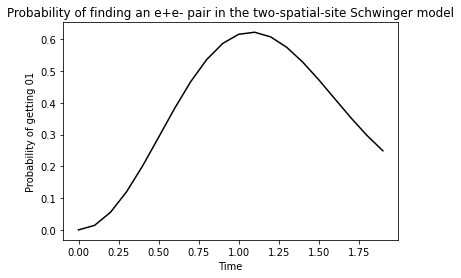

In [6]:
# time step
dt = 0.1
# number of time steps
NSteps = 20
nSteps = [n for n in range(NSteps)]

# initial state
v00 = np.kron(vect_0,vect_0)
# electron-positron pair state
v01 = np.kron(vect_0,vect_1)

P01_exact_med = []

for j in range(NSteps):
    t = nSteps[j]*dt
    res = np.transpose(v01)*U_exact(t,x,mu)*v00
    P01_exact_med.append(np.abs(res[0,0])**2)
    
print('Probability 01 = ', P01_exact_med)
Time = dt*np.arange(0,NSteps,1)
plt.plot(Time, P01_exact_med, 'black')
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')  
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

Probability 01 =  [0.0, 0.00014398790449350396, 0.0005758064955817693, 0.0012950205836890227, 0.002300905444598634, 0.003592447706157227, 0.005168346587841301, 0.007027015491370873, 0.009166583940041228, 0.01158489986393448, 0.014279532227667731, 0.017247773996835664, 0.020486645438812977, 0.023992897753096546, 0.027763017025890385, 0.03179322850316771, 0.036079501175986926, 0.040617552671389376, 0.045402854441769905, 0.05043063724518803]


Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

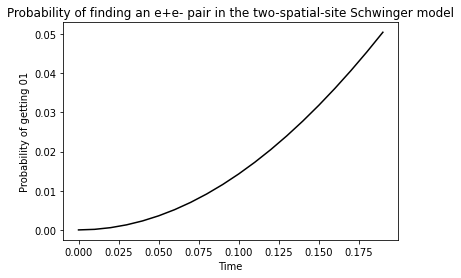

In [7]:
# time step (dt=0.01)
dt = 0.01
# number of time steps
NSteps = 20
nSteps = [n for n in range(NSteps)]

# initial state
v00 = np.kron(vect_0,vect_0)
# electron-positron pair state
v01 = np.kron(vect_0,vect_1)

P01_exact_small = []

for j in range(NSteps):
    t = nSteps[j]*dt
    res = np.transpose(v01)*U_exact(t,x,mu)*v00
    P01_exact_small.append(np.abs(res[0,0])**2)
    
print('Probability 01 = ', P01_exact_small)
Time = dt*np.arange(0,NSteps,1)
plt.plot(Time, P01_exact_small, 'black')
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')  
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

Probability 01 =  [0.0, 0.2916295751523156, 0.6159394179540106, 0.4724649524394642, 0.20905926086450743, 0.13492407065942236, 0.12414949652447956, 0.07717182224711708, 0.2826906394548993, 0.6944743696775955, 0.6232798879529129, 0.13668207339677807, 0.035336012581686775, 0.3476854719196155, 0.5055732286699276, 0.34695911065882246, 0.2142080114898531, 0.2184673861776303, 0.08516452672437075, 0.07501644921450618]


Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

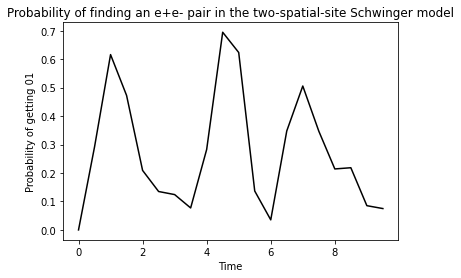

In [8]:
# time step (dt=0.5)
dt = 0.5
# number of time steps
NSteps = 20
nSteps = [n for n in range(NSteps)]

# initial state
v00 = np.kron(vect_0,vect_0)
# electron-positron pair state
v01 = np.kron(vect_0,vect_1)

P01_exact_large = []

for j in range(NSteps):
    t = nSteps[j]*dt
    res = np.transpose(v01)*U_exact(t,x,mu)*v00
    P01_exact_large.append(np.abs(res[0,0])**2)
    
print('Probability 01 = ', P01_exact_large)
Time = dt*np.arange(0,NSteps,1)
plt.plot(Time, P01_exact_large, 'black')
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')  
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

In [9]:
#### Trotterized Time Dynamics with Qiskit

# registers and quantum circuit
q = QuantumRegister(2,'q')
c = ClassicalRegister(2, 'c')
circ = QuantumCircuit(q,c)

# single first order Trotter step circuit
def U_trot(dt,q):
    circ.rxx(-2.0*(x/np.sqrt(2))*dt, 0, 1) 
    circ.sdg(q)
    circ.rxx(-2.0*(x/np.sqrt(2)*dt), 0, 1)
    circ.s(q)
    circ.h(q)
    circ.rxx(2.0*mu*dt, 0, 1) 
    circ.h(q)
    circ.rx(-2.0*x*(1.0 + (1.0/np.sqrt(2)))*dt, 1)
    circ.rz(1.0*dt, 1) 
    circ.rz(2.0*(1.0 + mu)*dt, 0)
    circ.h(0)
    circ.rxx(-2.0*x*(1.0 - (1.0/np.sqrt(2)))*dt, 0, 1) 
    circ.h(0)
    return circ

# approximate unitary propagator for t = dt*nSteps
def U_approx(circ, dt, nSteps, q):
    if nSteps>0:
        for ind in range(nSteps): 
            circ = U_trot(dt, q)  
    else: 
        circ = U_trot(0,q)
    return circ
    


Probability 01 =  [8.024582750190568e-32, 0.014313156771279416, 0.056026902699410464, 0.12129368419059881, 0.20398326507098963, 0.29639051486161255, 0.39011053854319555, 0.47696159768404267, 0.5498342224999619, 0.6033615686009527, 0.6343378778320995, 0.6418528090240887, 0.6271520713363146, 0.5932720056577452, 0.5445217666459916, 0.4858982665517088, 0.42251568446160365, 0.3591155418376728, 0.299699617579819, 0.24730186704778465]


Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

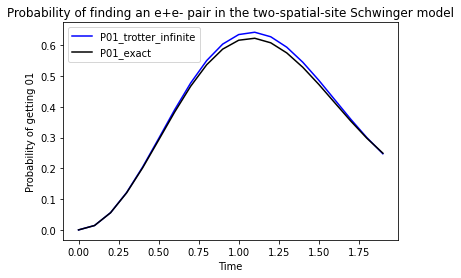

In [10]:
#### Infinite number of measurements
# time step
dt = 0.1
# number of time steps
NSteps = 20
nSteps = [n for n in range(NSteps)]
# number of measurements per task
nShots = 0

P01_trotter = []

# Select local simulator as backend device (statevector)
backend = Aer.get_backend('statevector_simulator')

# run 20 time steps
for j in range(NSteps):
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    job = execute(circ, backend, shots = nShots) 
    result = job.result() # collect run results
    outputstatee = result.get_statevector(circ) 
    P01_trotter.append(np.abs(outputstatee[2])**2) 

print('Probability 01 = ', P01_trotter)

Time = dt*np.arange(0,NSteps,1)

plt.plot(Time, P01_trotter, 'blue', label='P01_trotter_infinite')
plt.plot(Time, P01_exact_med, 'black', label='P01_exact')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')  
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model')



Time per time step= [0.018727779388427734, 0.016117334365844727, 0.02287745475769043, 0.033937931060791016, 0.037584781646728516, 0.04096245765686035, 0.044904470443725586, 0.05822134017944336, 0.05750107765197754, 0.06868648529052734, 0.07461094856262207, 0.07706284523010254, 0.08348727226257324, 0.08291172981262207, 0.09060120582580566, 0.09645557403564453, 0.09849858283996582, 0.11002683639526367, 0.23333239555358887, 0.11148810386657715]

Total time= 1.4583656787872314

Probability 01 =  [0, 0.01953125, 0.0625, 0.107421875, 0.1904296875, 0.2822265625, 0.4033203125, 0.4794921875, 0.5517578125, 0.609375, 0.6220703125, 0.6650390625, 0.6240234375, 0.6171875, 0.5751953125, 0.43359375, 0.4443359375, 0.3466796875, 0.2919921875, 0.2587890625]


Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

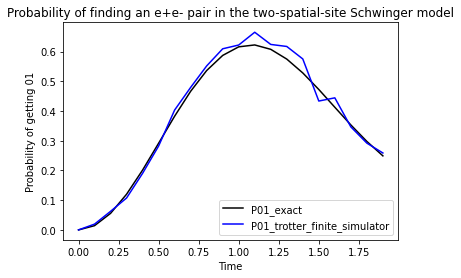

In [11]:
#### Finite measurements statistics on a quantum computer simulator
# time step
dt = 0.1
# number of time steps
NSteps=20
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 1024

circ_list = []
P01_trotter_finite_sim = []
time_per_step_sim = []

# Select Local simulator as a backend device 
backend = Aer.get_backend('qasm_simulator')

# run 20 time steps

timer_1_sim = time.time()

for j in range(NSteps):
    timer_2_sim = time.time()
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    circ.z(q)
    circ.measure(range(2),range(2)) # mesure 
    circ_list.append(circ)
    
    
    job = execute(circ, backend, shots=nShots) # creation a quantum task and run 
    result = job.result() # collect run results
    count = result.get_counts(circ)
    
    try:
        var = count.get('10')
        P01_trotter_finite_sim.append((1.0/nShots)*var)
    except:
        P01_trotter_finite_sim.append(0)
    
    time_2_sim = time.time() - timer_2_sim
    time_per_step_sim.append(time_2_sim)
    
    
time_1_sim = time.time() - timer_1_sim
print('Time per time step=', time_per_step_sim)
print('\nTotal time=', time_1_sim)
print('\nProbability 01 = ', P01_trotter_finite_sim)


Time = dt*np.arange(0,NSteps,1)

plt.plot(Time, P01_exact_med, 'black', label='P01_exact')
plt.plot(Time, P01_trotter_finite_sim, 'blue', label='P01_trotter_finite_simulator')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model')


[{'00': 477, '01': 16, '10': 7}, {'00': 455, '01': 18, '10': 23, '11': 4}, {'00': 387, '01': 32, '10': 70, '11': 11}, {'00': 324, '01': 36, '10': 124, '11': 16}, {'00': 253, '01': 44, '10': 184, '11': 19}, {'00': 152, '01': 40, '10': 279, '11': 29}, {'00': 114, '01': 54, '10': 305, '11': 27}, {'00': 82, '01': 75, '10': 299, '11': 44}, {'00': 68, '01': 87, '10': 278, '11': 67}, {'00': 59, '01': 130, '10': 233, '11': 78}, {'00': 73, '01': 147, '10': 181, '11': 99}, {'00': 92, '01': 131, '10': 172, '11': 105}, {'00': 105, '01': 150, '10': 143, '11': 102}, {'00': 96, '01': 152, '10': 125, '11': 127}, {'00': 120, '01': 159, '10': 86, '11': 135}, {'00': 124, '01': 124, '10': 87, '11': 165}, {'00': 156, '01': 124, '10': 79, '11': 141}, {'00': 118, '01': 130, '10': 98, '11': 154}, {'00': 127, '01': 134, '10': 97, '11': 142}, {'00': 125, '01': 124, '10': 97, '11': 154}]
Time per time step= []

Total time= 288.4755594730377

Probability 01 =  [0.014, 0.046, 0.14, 0.248, 0.368, 0.558, 0.61, 0.598

Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

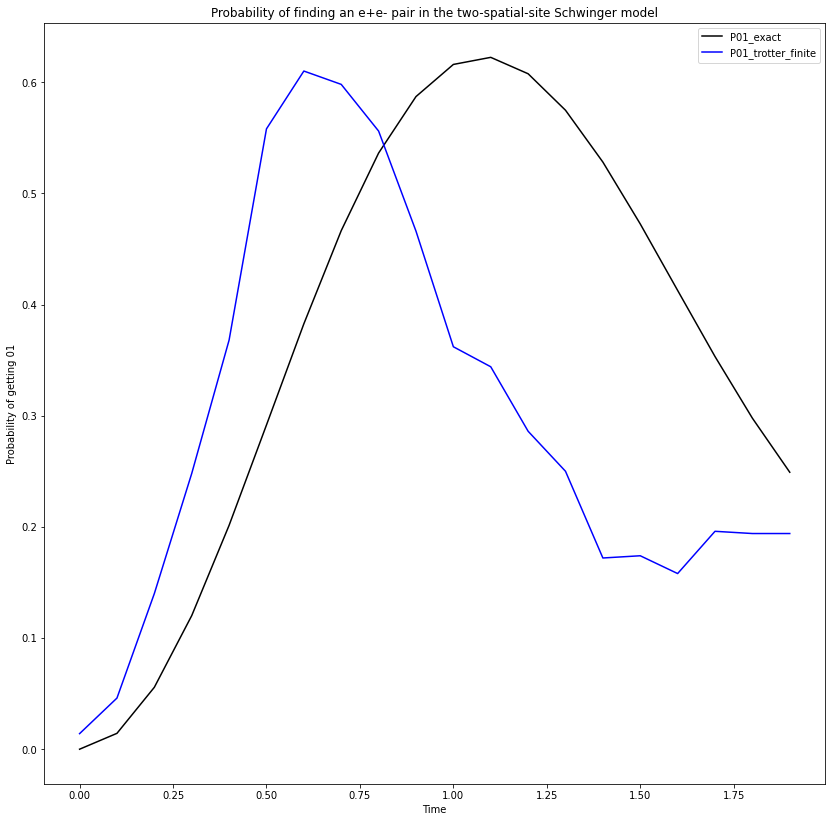

In [96]:
#### Finite measurements statistics on a quantum computer (ibmq_quito / dt=0.1)
# time step
dt = 0.1
# number of time steps
NSteps=20
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 500

circ_list = []
P01_trotter_finite_sim = []
time_per_step_sim = []

# Select a backend device 
backend = provider.get_backend('ibmq_quito')

# run 20 time steps

for j in range(NSteps):
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    circ.z(q)
    circ.measure(range(2),range(2)) # mesure 
    circ_list.append(circ)

timer_1_sim = time.time()
job = execute(circ_list, backend, shots=nShots) # creation a quantum task and run 
result = job.result() # collect run results
count = result.get_counts()
print(count)

for k in range(NSteps):
    count_var = count[k]
    try:
        var = count_var.get('10')
        P01_trotter_finite_sim.append((1.0/nShots)*var)
    except:
        P01_trotter_finite_sim.append(0)
      
time_1_sim = time.time() - timer_1_sim
print('Time per time step=', time_per_step_sim)
print('\nTotal time=', time_1_sim)
print('\nProbability 01 = ', P01_trotter_finite_sim)


Time = dt*np.arange(0,NSteps,1)

plt.plot(Time, P01_exact_med, 'black', label='P01_exact')
plt.plot(Time, P01_trotter_finite_sim, 'blue', label='P01_trotter_finite')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

[{'00': 488, '01': 7, '10': 5}, {'00': 462, '01': 24, '10': 11, '11': 3}, {'00': 430, '01': 40, '10': 24, '11': 6}, {'00': 425, '01': 36, '10': 33, '11': 6}, {'00': 413, '01': 33, '10': 48, '11': 6}, {'00': 342, '01': 55, '10': 84, '11': 19}, {'00': 343, '01': 41, '10': 92, '11': 24}, {'00': 311, '01': 49, '10': 118, '11': 22}, {'00': 258, '01': 65, '10': 152, '11': 25}, {'00': 242, '01': 62, '10': 162, '11': 34}, {'00': 208, '01': 70, '10': 181, '11': 41}, {'00': 183, '01': 63, '10': 217, '11': 37}, {'00': 178, '01': 72, '10': 204, '11': 46}, {'00': 157, '01': 91, '10': 197, '11': 55}, {'00': 157, '01': 84, '10': 199, '11': 60}, {'00': 150, '01': 94, '10': 189, '11': 67}, {'00': 143, '01': 97, '10': 201, '11': 59}, {'00': 148, '01': 81, '10': 203, '11': 68}, {'00': 159, '01': 100, '10': 172, '11': 69}, {'00': 142, '01': 111, '10': 168, '11': 79}]
Time per time step= []

Total time= 585.377733707428

Probability 01 =  [0.01, 0.022, 0.048, 0.066, 0.096, 0.168, 0.184, 0.23600000000000002

Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

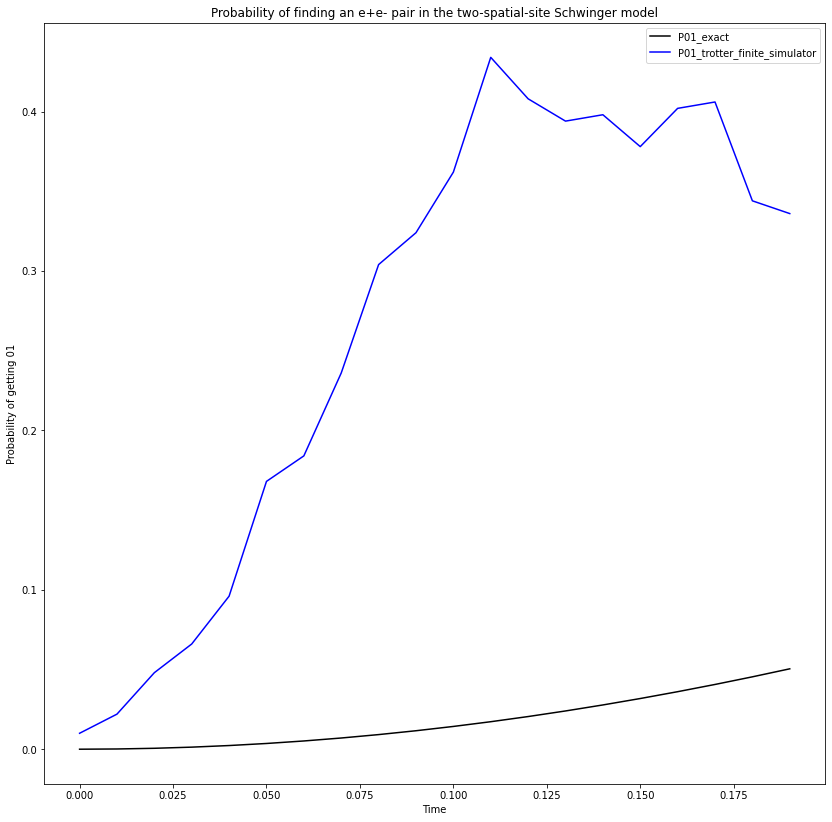

In [97]:
#### Finite measurements statistics on a quantum computer (ibmq_quito / dt=0.01)
# time step
dt = 0.01
# number of time steps
NSteps=20
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 500

circ_list = []
P01_trotter_finite_sim = []
time_per_step_sim = []

# Select a backend device 
backend = provider.get_backend('ibmq_quito')

# run 20 time steps

for j in range(NSteps):
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    circ.z(q)
    circ.measure(range(2),range(2)) # mesure 
    circ_list.append(circ)

timer_1_sim = time.time()
job = execute(circ_list, backend, shots=nShots) # creation a quantum task and run 
result = job.result() # collect run results
count = result.get_counts()
print(count)

for k in range(NSteps):
    count_var = count[k]
    try:
        var = count_var.get('10')
        P01_trotter_finite_sim.append((1.0/nShots)*var)
    except:
        P01_trotter_finite_sim.append(0)
      
time_1_sim = time.time() - timer_1_sim
print('Time per time step=', time_per_step_sim)
print('\nTotal time=', time_1_sim)
print('\nProbability 01 = ', P01_trotter_finite_sim)


Time = dt*np.arange(0,NSteps,1)

plt.plot(Time, P01_exact_small, 'black', label='P01_exact')
plt.plot(Time, P01_trotter_finite_sim, 'blue', label='P01_trotter_finite_simulator')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

[{'00': 484, '01': 9, '10': 7}, {'00': 327, '01': 15, '10': 150, '11': 8}, {'00': 100, '01': 51, '10': 323, '11': 26}, {'00': 106, '01': 103, '10': 225, '11': 66}, {'00': 157, '01': 172, '10': 72, '11': 99}, {'00': 197, '01': 116, '10': 88, '11': 99}, {'00': 227, '01': 98, '10': 95, '11': 80}, {'00': 260, '01': 100, '10': 65, '11': 75}, {'00': 173, '01': 133, '10': 126, '11': 68}, {'00': 77, '01': 127, '10': 225, '11': 71}, {'00': 135, '01': 95, '10': 206, '11': 64}, {'00': 250, '01': 93, '10': 81, '11': 76}, {'00': 244, '01': 89, '10': 85, '11': 82}, {'00': 149, '01': 82, '10': 175, '11': 94}, {'00': 110, '01': 103, '10': 168, '11': 119}, {'00': 119, '01': 167, '10': 95, '11': 119}, {'00': 110, '01': 175, '10': 99, '11': 116}, {'00': 165, '01': 134, '10': 102, '11': 99}, {'00': 220, '01': 108, '10': 83, '11': 89}, {'00': 184, '01': 111, '10': 89, '11': 116}]
Time per time step= []

Total time= 576.1100940704346

Probability 01 =  [0.014, 0.3, 0.646, 0.45, 0.14400000000000002, 0.176, 0

Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

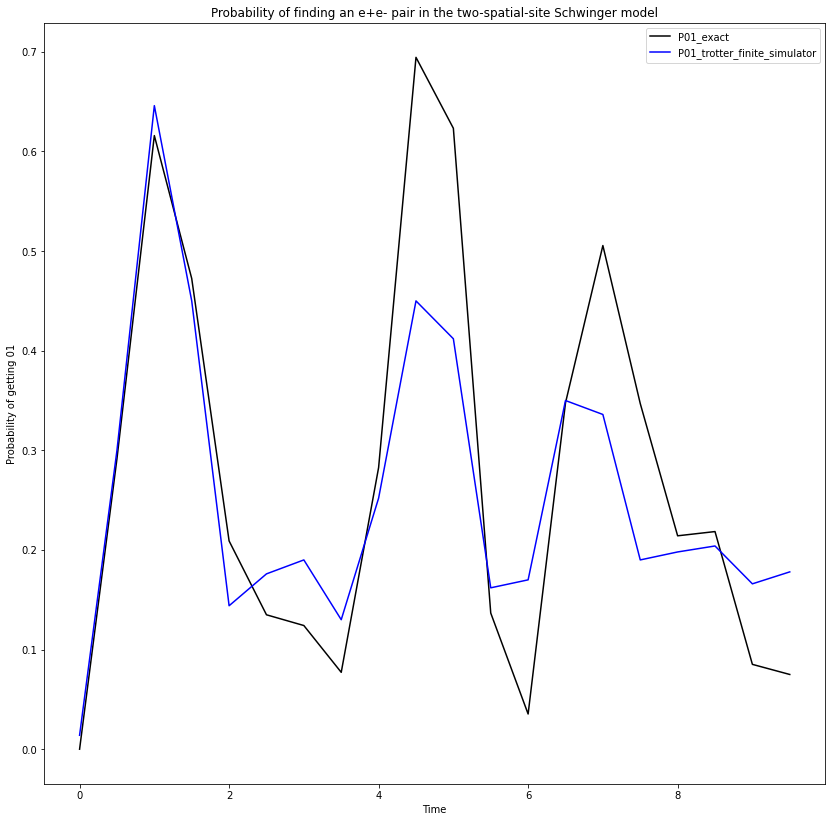

In [98]:
#### Finite measurements statistics on a quantum computer (ibmq_quito / dt=0.5)
# time step
dt = 0.5
# number of time steps
NSteps=20
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 500

circ_list = []
P01_trotter_finite_sim = []
time_per_step_sim = []

# Select a backend device
backend = provider.get_backend('ibmq_quito')

# run 20 time steps

for j in range(NSteps):
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    circ.z(q)
    circ.measure(range(2),range(2)) # mesure 
    circ_list.append(circ)

timer_1_sim = time.time()
job = execute(circ_list, backend, shots=nShots) # creation a quantum task and run 
result = job.result() # collect run results
count = result.get_counts()
print(count)

for k in range(NSteps):
    count_var = count[k]
    try:
        var = count_var.get('10')
        P01_trotter_finite_sim.append((1.0/nShots)*var)
    except:
        P01_trotter_finite_sim.append(0)
      
time_1_sim = time.time() - timer_1_sim
print('Time per time step=', time_per_step_sim)
print('\nTotal time=', time_1_sim)
print('\nProbability 01 = ', P01_trotter_finite_sim)


Time = dt*np.arange(0,NSteps,1)

plt.plot(Time, P01_exact_large, 'black', label='P01_exact')
plt.plot(Time, P01_trotter_finite_sim, 'blue', label='P01_trotter_finite_simulator')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

In [12]:
#### Finite measurements statistics on a quantum computer simulator (with basic bit-flip error noise model)

def Noisy_sim(p_reset, p_meas, p_gate1):

    # time step
    dt = 0.1
    # number of time steps
    NSteps=20
    nSteps=[n for n in range(NSteps)]
    # number of measurements per task
    nShots = 1024

    circ_list = []
    P01_trotter_finite_sim_noise = []

    ## Basic noise model : Basic bit-flip error noise model
    # Error probabilities
    #p_reset = 0.2
    #p_meas = 0.2
    #p_gate1 = 0

    # QuantumError objects
    error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
    error_gate2 = error_gate1.tensor(error_gate1)

    # Add errors to noise model
    noise_bit_flip = NoiseModel()
    noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
    noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
    noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
    noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

    #print(noise_bit_flip, '\n')
    ##

    # Create noisy simulator backend
    sim_noise = AerSimulator(noise_model=noise_bit_flip)


    # run 20 time steps
    timer_1_sim = time.time()

    for j in range(NSteps):
        circ = QuantumCircuit(2,2) # initialize a quantum circuit
        circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
        circ.z(q)
        circ.measure(range(2),range(2)) # mesure 
        # Transpile circuit for noisy basis gates
        circ_tnoise = transpile(circ, sim_noise)
        circ_list.append(circ_tnoise)

    timer_1_sim = time.time()

    # run the noisy simulation
    result_bit_flip = sim_noise.run(circ_list, nshots=nShots).result()
    counts_bit_flip = result_bit_flip.get_counts()
    #print(counts_bit_flip)

    for k in range(NSteps):
        count_var = counts_bit_flip[k]
        try:
            var = count_var.get('10')
            P01_trotter_finite_sim_noise.append((1.0/nShots)*var)
        except:
            P01_trotter_finite_sim_noise.append(0)
    
    #time_1_sim = time.time() - timer_1_sim
    #print('\nTotal time=', time_1_sim)
    print('\nProbability 01 = ', P01_trotter_finite_sim_noise)

    return P01_trotter_finite_sim_noise

#plt.plot(Time, diff_noisy_not, 'black')
#plt.xlabel('Time')
#plt.ylabel('Difference between noisy simulation and not')
#plt.title('Evolution with time of the probability difference between noisy simulation and not')



Probability 01 =  [0, 0.0166015625, 0.0478515625, 0.1171875, 0.2109375, 0.3046875, 0.3603515625, 0.4873046875, 0.564453125, 0.609375, 0.638671875, 0.6376953125, 0.6513671875, 0.57421875, 0.5478515625, 0.484375, 0.4130859375, 0.365234375, 0.310546875, 0.236328125]


Text(0, 0.5, 'P01')

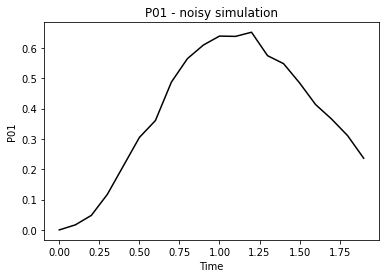

In [13]:
#### Finite measurements statistics on a quantum computer simulator (with basic bit-flip error noise model)

# time step
dt = 0.1
# number of time steps
NSteps=20
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 1024

circ_list = []
P01_trotter_finite_sim_noise = []

## Basic noise model : Basic bit-flip error noise model
# Error probabilities
p_reset = 0
p_meas = 0
p_gate1 = 0

    # QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

    # Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

    #print(noise_bit_flip, '\n')
    ##

    # Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_bit_flip)


    # run 20 time steps

for j in range(NSteps):
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    circ.z(q)
    circ.measure(range(2),range(2)) # mesure 
        # Transpile circuit for noisy basis gates
    circ_tnoise = transpile(circ, sim_noise)
    circ_list.append(circ_tnoise)

timer_1_sim = time.time()

    # run the noisy simulation
result_bit_flip = sim_noise.run(circ_list, nshots=nShots).result()
counts_bit_flip = result_bit_flip.get_counts()
    #print(counts_bit_flip)

for k in range(NSteps):
    count_var = counts_bit_flip[k]
    try:
        var = count_var.get('10')
        P01_trotter_finite_sim_noise.append((1.0/nShots)*var)
    except:
        P01_trotter_finite_sim_noise.append(0)
    
print('\nProbability 01 = ', P01_trotter_finite_sim_noise)

plt.plot(Time, P01_trotter_finite_sim_noise, 'black')
plt.title('P01 - noisy simulation')
plt.xlabel('Time')
plt.ylabel('P01')



Probability 01 =  [0, 0.013671875, 0.0556640625, 0.09765625, 0.205078125, 0.30859375, 0.369140625, 0.4765625, 0.5537109375, 0.6142578125, 0.6328125, 0.6494140625, 0.6328125, 0.5966796875, 0.5673828125, 0.4677734375, 0.4013671875, 0.353515625, 0.302734375, 0.2578125]

Probability 01 =  [0.091796875, 0.1103515625, 0.1240234375, 0.189453125, 0.24609375, 0.3056640625, 0.3583984375, 0.4384765625, 0.46875, 0.5224609375, 0.5595703125, 0.537109375, 0.5244140625, 0.517578125, 0.4619140625, 0.4296875, 0.3857421875, 0.302734375, 0.294921875, 0.275390625]

Probability 01 =  [0.1474609375, 0.171875, 0.2060546875, 0.224609375, 0.244140625, 0.2998046875, 0.361328125, 0.3779296875, 0.41796875, 0.4345703125, 0.458984375, 0.41796875, 0.439453125, 0.4052734375, 0.404296875, 0.3740234375, 0.3154296875, 0.3271484375, 0.279296875, 0.2509765625]

Probability 01 =  [0.220703125, 0.201171875, 0.2529296875, 0.2216796875, 0.275390625, 0.28125, 0.3349609375, 0.3203125, 0.357421875, 0.3662109375, 0.3994140625, 0.

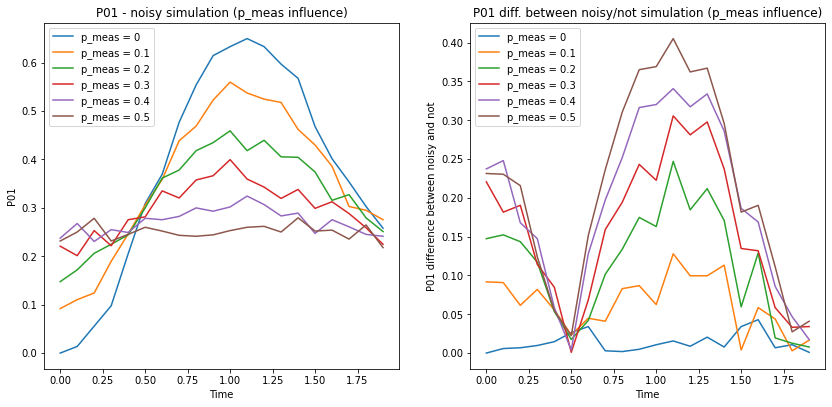


Probability 01 =  [0.26171875, 0.2451171875, 0.23828125, 0.2197265625, 0.2177734375, 0.2119140625, 0.2119140625, 0.185546875, 0.1953125, 0.2041015625, 0.1875, 0.2041015625, 0.216796875, 0.201171875, 0.2138671875, 0.2353515625, 0.2333984375, 0.2421875, 0.25, 0.267578125]

Probability 01 =  [0, 0.01171875, 0.0576171875, 0.1123046875, 0.193359375, 0.3056640625, 0.4130859375, 0.4990234375, 0.556640625, 0.5849609375, 0.662109375, 0.6337890625, 0.638671875, 0.58203125, 0.541015625, 0.4873046875, 0.4169921875, 0.353515625, 0.2822265625, 0.232421875]

Probability 01 =  [0, 0.0146484375, 0.0556640625, 0.12109375, 0.1953125, 0.306640625, 0.390625, 0.46875, 0.5380859375, 0.6064453125, 0.6259765625, 0.6591796875, 0.6181640625, 0.6083984375, 0.537109375, 0.4970703125, 0.4228515625, 0.361328125, 0.2724609375, 0.2626953125]

Probability 01 =  [0, 0.01953125, 0.048828125, 0.126953125, 0.203125, 0.29296875, 0.3662109375, 0.466796875, 0.544921875, 0.5927734375, 0.634765625, 0.65625, 0.623046875, 0.5761

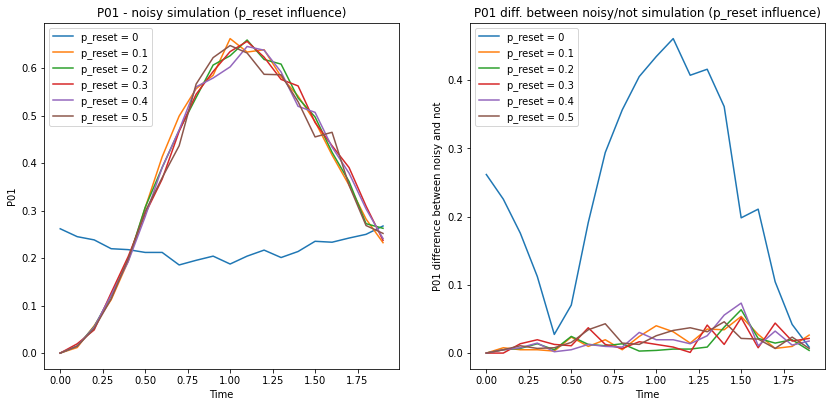


Probability 01 =  [0, 0.0146484375, 0.0537109375, 0.1103515625, 0.1982421875, 0.3017578125, 0.3916015625, 0.4638671875, 0.5283203125, 0.619140625, 0.6298828125, 0.650390625, 0.634765625, 0.6123046875, 0.53125, 0.498046875, 0.4033203125, 0.3818359375, 0.30078125, 0.23046875]

Probability 01 =  [0.001953125, 0.02734375, 0.0654296875, 0.1123046875, 0.20703125, 0.259765625, 0.349609375, 0.39453125, 0.4384765625, 0.4560546875, 0.478515625, 0.48046875, 0.4736328125, 0.44921875, 0.423828125, 0.4345703125, 0.4033203125, 0.3369140625, 0.3349609375, 0.2783203125]

Probability 01 =  [0.005859375, 0.0224609375, 0.072265625, 0.14453125, 0.2099609375, 0.26171875, 0.3115234375, 0.3583984375, 0.4052734375, 0.3935546875, 0.39453125, 0.3701171875, 0.3955078125, 0.37890625, 0.3623046875, 0.34765625, 0.3486328125, 0.302734375, 0.31640625, 0.294921875]

Probability 01 =  [0.009765625, 0.0517578125, 0.099609375, 0.166015625, 0.203125, 0.21875, 0.287109375, 0.3154296875, 0.3291015625, 0.357421875, 0.3710937

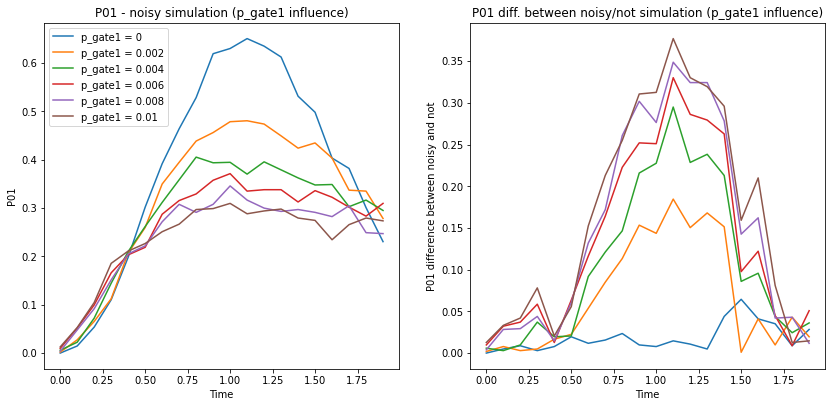

In [14]:
#### Finite measurements statistics on a quantum computer simulator (with basic bit-flip error noise model)
## Basic noise model : Basic bit-flip error noise model
# Error probabilities
p_meas = 0
p_reset = 0
p_gate1 = 0

# Variation of the error probabilities
step_meas = 0.1
step_reset = 0.1
step_gate1 = 0.002
nCalc = 6
n = 1

for j in range(3*nCalc):
    
    # time step
    dt = 0.1
    # number of time steps
    NSteps=20
    nSteps=[n for n in range(NSteps)]
    # number of measurements per task
    nShots = 1024
    
    circ_list = []
    P01_trotter_finite_sim_noise = []
    
        # QuantumError objects
    error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
    error_gate2 = error_gate1.tensor(error_gate1)

        # Add errors to noise model
    noise_bit_flip = NoiseModel()
    noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
    noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
    noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
    noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

        #print(noise_bit_flip, '\n')
        # Create noisy simulator backend
    sim_noise = AerSimulator(noise_model=noise_bit_flip)


        # run 20 time steps

    for j in range(NSteps):
        circ = QuantumCircuit(2,2) # initialize a quantum circuit
        circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
        circ.z(q)
        circ.measure(range(2),range(2)) # mesure 
        # Transpile circuit for noisy basis gates
        circ_tnoise = transpile(circ, sim_noise)
        circ_list.append(circ_tnoise)


        # run the noisy simulation
    result_bit_flip = sim_noise.run(circ_list, nshots=nShots).result()
    counts_bit_flip = result_bit_flip.get_counts()
        #print(counts_bit_flip)
    
    diff_noisy_not = np.zeros(NSteps)

    for k in range(NSteps):
        count_var = counts_bit_flip[k]
        try:
            var = count_var.get('10')
            P01_trotter_finite_sim_noise.append((1.0/nShots)*var)
        except:
            P01_trotter_finite_sim_noise.append(0)
        
        diff_noisy_not[k] = abs(P01_trotter_finite_sim[k] - P01_trotter_finite_sim_noise[k])
    
    print('\nProbability 01 = ', P01_trotter_finite_sim_noise)
    
    if n<=nCalc:
        lab = 'p_meas = ' + str(round(p_meas, 3)) 
        plt.rcParams["figure.figsize"] = (14,14)
        # Noisy simulation
        plt.subplot(2,2,1)
        plt.plot(Time, P01_trotter_finite_sim_noise, label=lab)
        plt.title('P01 - noisy simulation (p_meas influence)')
        plt.xlabel('Time')
        plt.ylabel('P01')
        plt.legend()
        # Difference between noisy and not
        plt.subplot(2,2,2)
        plt.plot(Time, diff_noisy_not, label=lab)
        plt.title('P01 diff. between noisy/not simulation (p_meas influence)')
        plt.xlabel('Time')
        plt.ylabel('P01 difference between noisy and not')
        plt.legend()
        # Error probability augmentation
        p_meas += step_meas
    if n==nCalc:
        plt.show()
    if nCalc<n<=2*nCalc:
        p_meas = 0
        lab = 'p_reset = ' + str(round(p_reset,3))
        plt.rcParams["figure.figsize"] = (14,14)
        # Noisy simulation
        plt.subplot(2,2,1)
        plt.plot(Time, P01_trotter_finite_sim_noise, label=lab)
        plt.title('P01 - noisy simulation (p_reset influence)')
        plt.xlabel('Time')
        plt.ylabel('P01')
        plt.legend()
        # Difference between noisy and not
        plt.subplot(2,2,2)
        plt.plot(Time, diff_noisy_not, label=lab)
        plt.title('P01 diff. between noisy/not simulation (p_reset influence)')
        plt.xlabel('Time')
        plt.ylabel('P01 difference between noisy and not')
        plt.legend()
        # Error probability augmentation
        p_reset += step_reset
    if n==2*nCalc:
        plt.show()
    if 2*nCalc<n<=3*nCalc:
        p_reset = 0
        lab = 'p_gate1 = ' + str(round(p_gate1,3))
        plt.rcParams["figure.figsize"] = (14,14)
        # Noisy simulation
        plt.subplot(2,2,1)
        plt.plot(Time, P01_trotter_finite_sim_noise, label=lab)
        plt.title('P01 - noisy simulation (p_gate1 influence)')
        plt.xlabel('Time')
        plt.ylabel('P01')
        plt.legend()
        # Difference between noisy and not
        plt.subplot(2,2,2)
        plt.plot(Time, diff_noisy_not, label=lab)
        plt.title('P01 diff. between noisy/not simulation (p_gate1 influence)')
        plt.xlabel('Time')
        plt.ylabel('P01 difference between noisy and not')
        # Error probability augmentation
        p_gate1 += step_gate1
    if n==3*nCalc:
        plt.show()
        
    n += 1
    